In [3]:
pip install xgboost


     ---------------------------------------- 99.7/99.7 MB 2.3 MB/s eta 0:00:00


In [4]:
####################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################3
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB
from xgboost import plot_importance ## Plotting Importance Variables 


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [5]:
# Read the data in
employee = pd.read_csv(r"churn.csv")

In [6]:
print ("Rows     : " ,employee.shape[0])
print ("Columns  : " ,employee.shape[1])


Rows     :  7043
Columns  :  21


In [7]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Missing Value

In [8]:
#Replacing spaces with null values in total charges column
employee['TotalCharges'] =employee["TotalCharges"].replace(" ",np.nan).astype(float) 
# string cannot be convert float direclty 

In [9]:
employee.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
employee.TotalCharges.fillna(employee.TotalCharges.mean(),inplace=True) # one column at a time bb

In [11]:
employee.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Removing Irrelavent Variable 

In [12]:
employee = employee.drop(['customerID'],axis=1)
employee.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
# #Employee Numeric columns
employee_num = employee[employee.select_dtypes(include=[np.number]).columns.tolist()]
employee_num.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15


In [14]:
employee_dummies = employee[employee.select_dtypes(include=['object']).columns.tolist()]
employee_dummies.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [15]:
from sklearn.preprocessing import LabelEncoder
employee_dummies=employee_dummies.apply(LabelEncoder().fit_transform)
employee_dummies.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1


In [16]:
employee_combined = pd.concat([employee_num, employee_dummies],axis=1)

employee_combined.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


# Data Partition-1

In [17]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = employee_combined.drop('Churn',axis=1)
y = employee_combined[["Churn"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [18]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 5634.
The number of samples into the Test data is 1409.


# Model -- Xg Boosting

In [19]:
model_parameters = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [3, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]} #parent 

In [20]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier()   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=10, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(x_train, y_train)  ## Model building

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [21]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 10, 'reg_lambda': 1}


In [22]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
final_mod.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.6,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [24]:
parent_node = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_node = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

In [33]:
pip install graphviz


     ---------------------------------------- 47.0/47.0 kB 1.1 MB/s eta 0:00:00


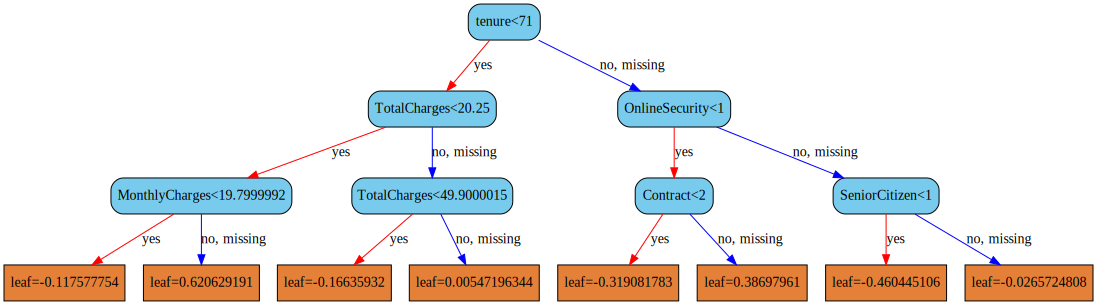

In [34]:
xgb.to_graphviz(final_mod,num_trees=9,size="5,5",   # Tree = 10 
               condition_node_params=parent_node,
               leaf_node_params=child_node)

Yhat = Initial Prediction + Learning rate * Average error0 + Learning rate * Average error2 + ... + Learning rate * Average error49 
yhat = 0.5               + 0.3           * -0.568063915   +        0.3    * -0.455574751    +  

# Accuracy of Train

In [35]:
train = pd.concat([x_train,y_train],axis=1)
train['Predicted'] = final_mod.predict(x_train)  # MODEL = Final_mod
train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Predicted
1814,0,12,19.70,258.35,1,1,1,1,0,2,...,1,1,1,1,1,2,0,3,0,0
5946,0,42,73.90,3160.55,0,0,0,1,0,0,...,2,2,2,0,2,1,0,1,1,0
3881,0,71,65.15,4681.75,1,1,0,1,2,0,...,2,0,2,0,0,2,0,0,0,0
2389,0,71,85.45,6300.85,1,1,1,1,2,0,...,0,2,2,2,2,1,0,2,0,0
3676,0,30,70.40,2044.75,1,0,0,1,0,0,...,2,0,2,2,0,1,0,2,0,0


In [36]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4113
           1       0.69      0.56      0.62      1521

    accuracy                           0.81      5634
   macro avg       0.77      0.73      0.75      5634
weighted avg       0.81      0.81      0.81      5634



# Accuracy of Test

In [37]:
test = pd.concat([x_test,y_test],axis=1)
test['Predicted'] = final_mod.predict(x_test)  # MODEL = Final_mod
test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Predicted
3381,0,41,79.85,3320.75,0,0,0,1,0,0,...,0,2,2,2,2,1,1,0,0,0
6180,1,66,102.40,6471.85,0,0,0,1,2,1,...,0,0,0,2,2,2,1,0,0,0
4829,0,12,45.00,524.35,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3737,0,5,50.60,249.95,0,0,0,1,2,0,...,0,0,0,0,0,0,1,3,1,0
4249,0,10,65.90,660.05,0,1,1,1,0,0,...,2,2,0,0,2,1,1,3,0,0


In [38]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1061
           1       0.64      0.55      0.59       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



# Finished

# Importance Feature

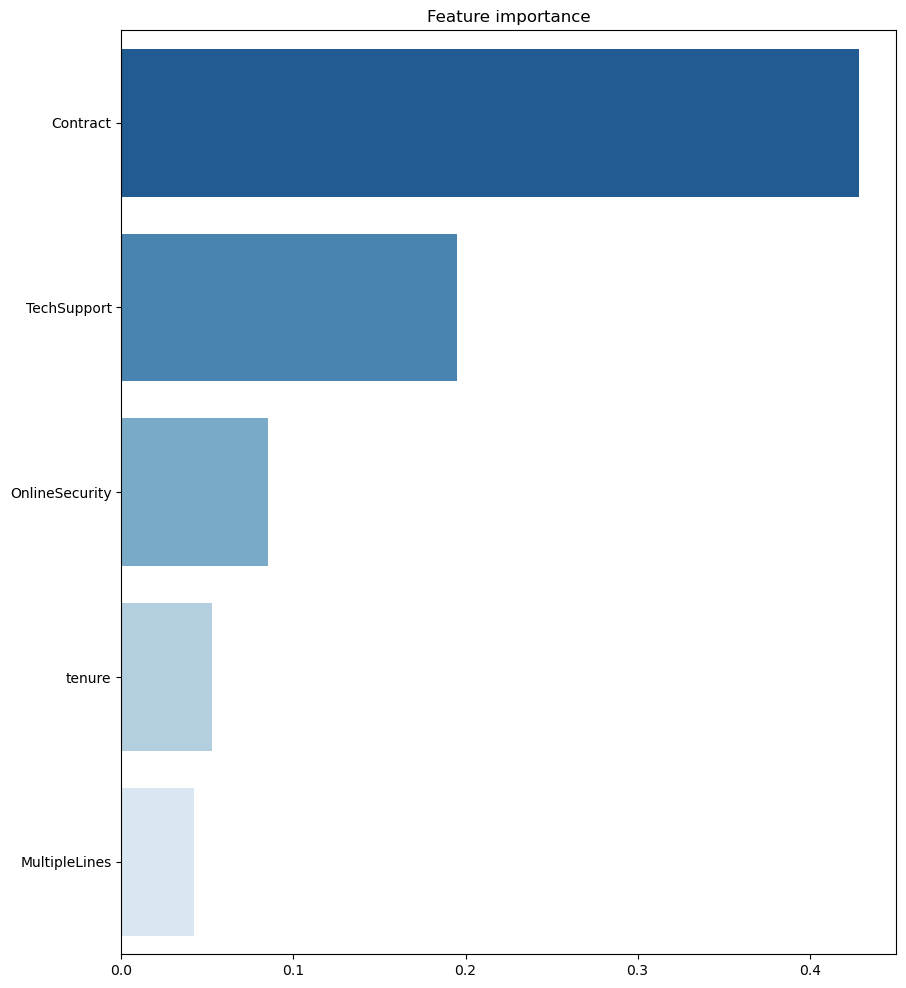

In [39]:
# Plot features importances
imp = pd.Series(data=final_mod.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

In [40]:
employee_combined.Churn.value_counts(normalize=True)*100

0    73.463013
1    26.536987
Name: Churn, dtype: float64

In [32]:
import pickle

pickle.dump(final_mod, open(r'C:\Users\Hp\Desktop\Python Code\End_to_End Project\churn deployment_Final\build_boost.pkl','wb'))  # Exporting model from python to laptop

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Hp\\Desktop\\Python Code\\End_to_End Project\\churn deployment_Final\\build_boost.pkl'